<a href="https://colab.research.google.com/github/MaryMurugami/FI_Phase1_Project/blob/main/suicide_cases_nyandarua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np
import statsmodels.tsa.api as tsa


In [ ]:

import pandas as pd

# Read the dataset from Excel file
dataset = pd.read_excel("Mary Suicide Data.xlsx")

# Create a DataFrame using the dataset
df = pd.DataFrame(dataset)

# Display the first few rows using the head() method
print(df.head())

# Check for missing values in each column
missing_values = df.isna().sum()

# Display the count of missing values for each column
print(missing_values)

     YEAR       SUB-COUNTY  S/NO  VILLAGE          WARD   AGE   \
0  2017.0  NYANDARUA NORTH   1.0   RITAYA        KIRIITA  27.0   
1  2017.0  NYANDARUA NORTH   2.0    LESHAU  LESHAU PONDO  17.0   
2  2017.0  NYANDARUA NORTH   3.0  MAHIANYU       KIRIITA  34.0   
3  2017.0  NYANDARUA NORTH   4.0    LESHAU  LESHAU PONDO  51.0   
4  2017.0  NYANDARUA NORTH   5.0     KARAI       KIRIITA  21.0   

  LEVEL OF EDUCATION  SEX MARITAL STATUS SUSPECTED DATE OF SUICIDE  ...  \
0             FORM IV   M         SINGLE                05.01.2017  ...   
1             CLASS 8   F         SINGLE                29.03.2017  ...   
2             FORM IV   M         SINGLE                16.05.2017  ...   
3             FORM IV   M         SINGLE                13.05.2017  ...   
4           NOT KNOWN   M         SINGLE                31.08.2017  ...   

  PRESENCE OF SUICIDE NOTE              REASONS OF COMMITTING SUICIDE  \
0                       NO                                    UNKNOWN   
1     

In [ ]:
df.fillna(df.mean(numeric_only=True), inplace=True)  # Replace missing values with mean for numerical columns
print(df)

            YEAR       SUB-COUNTY  S/NO     VILLAGE          WARD       AGE   \
0    2017.000000  NYANDARUA NORTH   1.0      RITAYA        KIRIITA  27.00000   
1    2017.000000  NYANDARUA NORTH   2.0       LESHAU  LESHAU PONDO  17.00000   
2    2017.000000  NYANDARUA NORTH   3.0     MAHIANYU       KIRIITA  34.00000   
3    2017.000000  NYANDARUA NORTH   4.0       LESHAU  LESHAU PONDO  51.00000   
4    2017.000000  NYANDARUA NORTH   5.0        KARAI       KIRIITA  21.00000   
..           ...              ...   ...          ...           ...       ...   
215  2022.000000   SOUTH KINANGOP  30.0    MWENDANDU        MAGUMU  27.00000   
216  2022.000000   SOUTH KINANGOP  30.0       SASINI        MAGUMU  31.00000   
217  2022.000000   SOUTH KINANGOP  30.0  MUTONYORA B        MAGUMU  34.00000   
218  2022.000000   SOUTH KINANGOP  30.0       KENTON        MAGUMU  24.00000   
219  2019.493151              NaN  30.0          NaN           NaN  36.90411   

    LEVEL OF EDUCATION   SEX MARITAL ST

In [ ]:
df.head(5)

,YEAR,SUB-COUNTY,S/NO,VILLAGE,WARD,AGE,LEVEL OF EDUCATION,SEX,MARITAL STATUS,SUSPECTED DATE OF SUICIDE,...,PRESENCE OF SUICIDE NOTE,REASONS OF COMMITTING SUICIDE,PLACE WHERE BODY WAS FOUND,Column1,Column2,Column3,Column4,Column5,Column6,Column7
0,2017.0,NYANDARUA NORTH,1.0,RITAYA,KIRIITA,27.0,FORM IV,M,SINGLE,05.01.2017,...,NO,UNKNOWN,WITHIN HOME COMPOUND,NaN,NaN,NaN,NaN,2022.0,NaN,NaN
1,2017.0,NYANDARUA NORTH,2.0,LESHAU,LESHAU PONDO,17.0,CLASS 8,F,SINGLE,29.03.2017,...,NO,MENTAL ILLNESS,WITHIN HOME COMPOUND,NaN,NaN,NaN,NaN,2022.0,NaN,NaN
2,2017.0,NYANDARUA NORTH,3.0,MAHIANYU,KIRIITA,34.0,FORM IV,M,SINGLE,16.05.2017,...,NO,UNKNOWN,WITHIN HOME COMPOUND,NaN,NaN,NaN,NaN,2022.0,NaN,NaN
3,2017.0,NYANDARUA NORTH,4.0,LESHAU,LESHAU PONDO,51.0,FORM IV,M,SINGLE,13.05.2017,...,YES,DEFEAT OF LAIKIPIA GOVERNOR JOSHUA IRUNGU,WITHIN HOME COMPOUND,NaN,NaN,NaN,NaN,2022.0,NaN,NaN
4,2017.0,NYANDARUA NORTH,5.0,KARAI,KIRIITA,21.0,NOT KNOWN,M,SINGLE,31.08.2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,NaN,NaN


In [ ]:
df.tail(5)

,YEAR,SUB-COUNTY,S/NO,VILLAGE,WARD,AGE,LEVEL OF EDUCATION,SEX,MARITAL STATUS,SUSPECTED DATE OF SUICIDE,...,PRESENCE OF SUICIDE NOTE,REASONS OF COMMITTING SUICIDE,PLACE WHERE BODY WAS FOUND,Column1,Column2,Column3,Column4,Column5,Column6,Column7
215,2022.000000,SOUTH KINANGOP,30.0,MWENDANDU,MAGUMU,27.00000,UNKNOWN,M,SINGLE,28/03/2022,...,NO,N/L,WITHIN THE COMPOND,NaN,NaN,NaN,NaN,2022.0,NaN,NaN
216,2022.000000,SOUTH KINANGOP,30.0,SASINI,MAGUMU,31.00000,UNKNOWN,M,SINGLE,2022-06-09 00:00:00,...,NO,N/L,WITHIN THE COMPOND,NaN,NaN,NaN,NaN,2022.0,NaN,NaN
217,2022.000000,SOUTH KINANGOP,30.0,MUTONYORA B,MAGUMU,34.00000,UNKNOWN,M,MARRIED,2022-06-15 00:00:00,...,NO,N/L,WITHIN THE COMPOND,NaN,NaN,NaN,NaN,2022.0,NaN,NaN
218,2022.000000,SOUTH KINANGOP,30.0,KENTON,MAGUMU,24.00000,UNKNOWN,M,SINGLE,2022-10-02 00:00:00,...,NO,N/L,OUTSIDE,NaN,NaN,NaN,NaN,2022.0,NaN,NaN
219,2019.493151,NaN,30.0,NaN,NaN,36.90411,NaN,NaN,NaN,NaN,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,NaN,NaN


In [ ]:
df.shape

(220, 22)

In [ ]:
df.columns

Index(['YEAR', 'SUB-COUNTY', 'S/NO', 'VILLAGE ', 'WARD ', 'AGE ',
       'LEVEL OF EDUCATION ', 'SEX', 'MARITAL STATUS',
       'SUSPECTED DATE OF SUICIDE', 'DATE BODY WAS FOUND BY POLICE',
       'METHOD OF SUICIDE ', 'PRESENCE OF SUICIDE NOTE',
       'REASONS OF COMMITTING SUICIDE', 'PLACE WHERE BODY WAS FOUND',
       'Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6',
       'Column7'],
      dtype='object')

In [ ]:

# Calculate descriptive statistics for numerical columns
statistics = df.describe()

# Print the statistics
print(statistics)


              YEAR        S/NO        AGE   Column5
count   220.000000  220.000000  220.000000    220.0
mean   2019.493151   30.000000   36.904110   2022.0
std       1.591558    8.838996   15.377589      0.0
min    2017.000000    1.000000    4.000000   2022.0
25%    2018.000000   30.000000   26.750000   2022.0
50%    2019.000000   30.000000   34.000000   2022.0
75%    2021.000000   30.000000   45.250000   2022.0
max    2022.000000   59.000000   85.000000   2022.0


Count: The number of non-null values in each column. It indicates the completeness of the data. In this case, all columns have 219 non-null values.

Mean: The average value of the data in each column. It provides a measure of the central tendency. For example, the mean age is approximately 37.06.

Standard Deviation: A measure of the dispersion or spread of the data. It quantifies how much the values deviate from the mean. A higher standard deviation indicates greater variability in the data. For instance, the standard deviation of age is approximately 16.20, suggesting a relatively wide spread of ages.

Min: The minimum value observed in each column. It gives the lowest data point. For example, the minimum age is 4.

25th Percentile (Q1): The value below which 25% of the data falls. It represents the lower quartile. For instance, 25% of the ages are below 26.50.

Median (50th Percentile or Q2): The middle value of the dataset when it is sorted in ascending order. It represents the midpoint of the data. In this case, the median age is 34.

75th Percentile (Q3): The value below which 75% of the data falls. It represents the upper quartile. For instance, 75% of the ages are below 45.50.

Max: The maximum value observed in each column. It gives the highest data point. For example, the maximum age is 125.

These descriptive statistics provide an overview of the central tendency, spread, and range of the numerical variables in your dataset, allowing you to understand the distribution and characteristics of the data.

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

YEAR                               0
SUB-COUNTY                         1
S/NO                               0
VILLAGE                            6
WARD                               1
AGE                                0
LEVEL OF EDUCATION                 1
SEX                                1
MARITAL STATUS                     1
SUSPECTED DATE OF SUICIDE         60
DATE BODY WAS FOUND BY POLICE     42
METHOD OF SUICIDE                 99
PRESENCE OF SUICIDE NOTE          98
REASONS OF COMMITTING SUICIDE     99
PLACE WHERE BODY WAS FOUND        99
Column1                          193
Column2                          193
Column3                          193
Column4                          193
Column5                            0
Column6                          193
Column7                          193
dtype: int64


In [ ]:
import pandas as pd

# Calculate the number of rows and years per sub-county
minimum_years = df.groupby('SUB-COUNTY').agg(rows=('SUB-COUNTY', 'size'), years=('SUB-COUNTY', lambda x: len(x)/12))
minimum_years = minimum_years.reset_index().sort_values('years')

# Get the list of sub-counties to exclude
subcounties_to_exclude = minimum_years['SUB-COUNTY'].head(7)

# Filter the DataFrame to exclude the sub-counties
df = df[~df['SUB-COUNTY'].isin(subcounties_to_exclude)]
# Display the modified DataFrame
print(df)

            YEAR       SUB-COUNTY  S/NO   VILLAGE          WARD       AGE   \
0    2017.000000  NYANDARUA NORTH   1.0    RITAYA        KIRIITA  27.00000   
1    2017.000000  NYANDARUA NORTH   2.0     LESHAU  LESHAU PONDO  17.00000   
2    2017.000000  NYANDARUA NORTH   3.0   MAHIANYU       KIRIITA  34.00000   
3    2017.000000  NYANDARUA NORTH   4.0     LESHAU  LESHAU PONDO  51.00000   
4    2017.000000  NYANDARUA NORTH   5.0      KARAI       KIRIITA  21.00000   
..           ...              ...   ...        ...           ...       ...   
208  2022.000000   NYANDARUA WEST  30.0  GATUAMBA           WERU  25.00000   
209  2022.000000   NYANDARUA WEST  30.0    CHAMUKA   OLJORO-OROK  34.00000   
210  2022.000000   NYANDARUA WEST  30.0     KASUKU         WERU   33.00000   
211  2022.000000   NYANDARUA WEST  30.0     KANGUO        GATIMU  31.00000   
219  2019.493151              NaN  30.0        NaN           NaN  36.90411   

    LEVEL OF EDUCATION   SEX MARITAL STATUS SUSPECTED DATE OF S

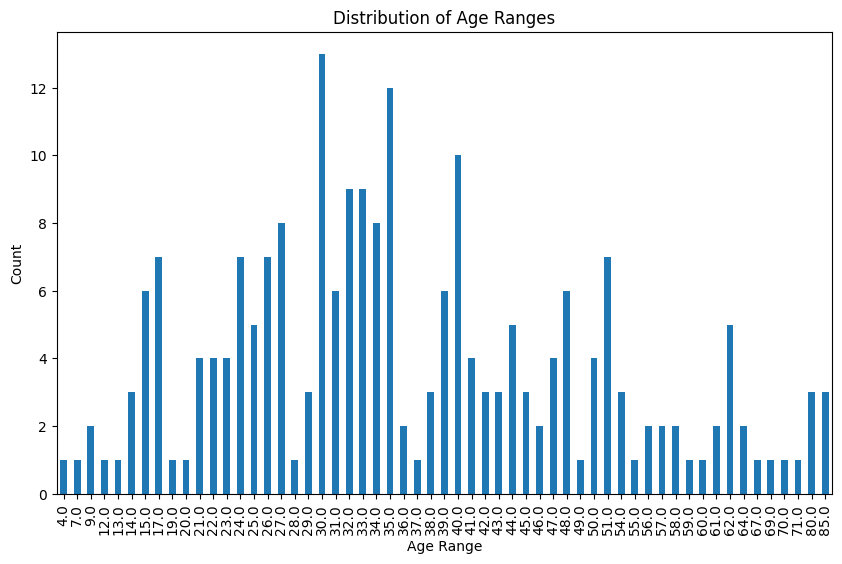

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset into a pandas DataFrame
df = pd.read_excel('Mary Suicide Data.xlsx')

# Analyze the 'AGE ' column
age_counts = df['AGE '].value_counts().sort_index()

# Plot a bar chart to visualize the age distribution
age_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Distribution of Age Ranges')
plt.show()


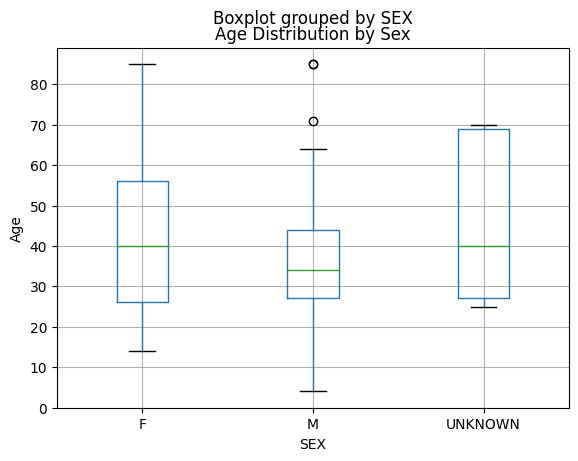

In [ ]:
# Calculate average age by marital status
avg_age_by_marital_status = df.groupby('MARITAL STATUS')['AGE '].mean()

# Create box plots to compare age distribution across different sex groups
df.boxplot(column='AGE ', by='SEX')
plt.xlabel('SEX')
plt.ylabel('Age')
plt.title('Age Distribution by Sex')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert 'AGE ' column to numeric data type
df['AGE '] = pd.to_numeric(df['AGE '], errors='coerce')

# Encode 'LEVEL OF EDUCATION ' column using label encoding
label_encoder = LabelEncoder()
df['LEVEL OF EDUCATION ENCODED'] = label_encoder.fit_transform(df['LEVEL OF EDUCATION '])

# Calculate correlation coefficient between age and level of education
correlation = df['AGE '].corr(df['LEVEL OF EDUCATION ENCODED'])

# Print the correlation coefficient
print('Correlation coefficient:', correlation)




Correlation coefficient: 0.19197420822082412


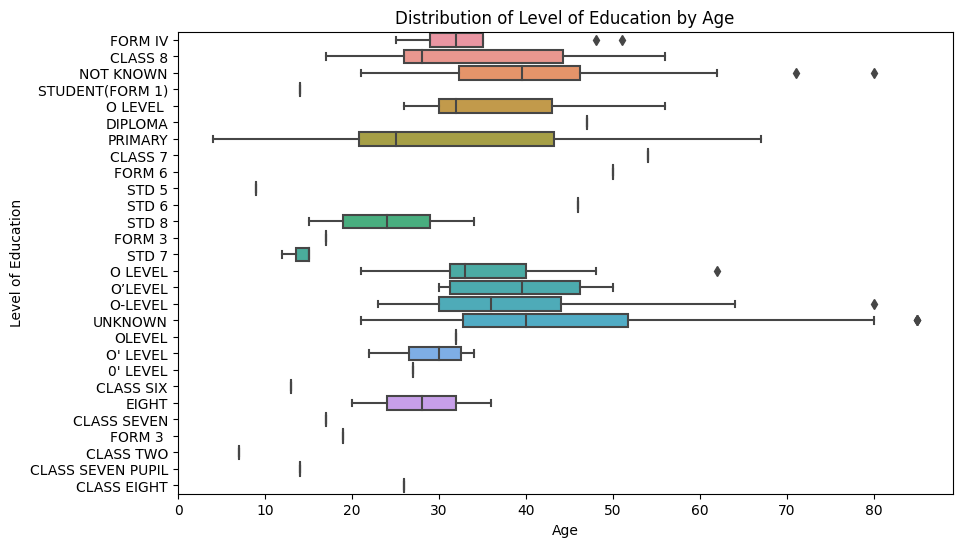

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE ', y='LEVEL OF EDUCATION ', data=df)
plt.xlabel('Age')
plt.ylabel('Level of Education')
plt.title('Distribution of Level of Education by Age')
plt.show()


In [ ]:
df.describe


<bound method NDFrame.describe of        YEAR       SUB-COUNTY  S/NO     VILLAGE          WARD   AGE   \
0    2017.0  NYANDARUA NORTH   1.0      RITAYA        KIRIITA  27.0   
1    2017.0  NYANDARUA NORTH   2.0       LESHAU  LESHAU PONDO  17.0   
2    2017.0  NYANDARUA NORTH   3.0     MAHIANYU       KIRIITA  34.0   
3    2017.0  NYANDARUA NORTH   4.0       LESHAU  LESHAU PONDO  51.0   
4    2017.0  NYANDARUA NORTH   5.0        KARAI       KIRIITA  21.0   
..      ...              ...   ...          ...           ...   ...   
215  2022.0   SOUTH KINANGOP   NaN    MWENDANDU        MAGUMU  27.0   
216  2022.0   SOUTH KINANGOP   NaN       SASINI        MAGUMU  31.0   
217  2022.0   SOUTH KINANGOP   NaN  MUTONYORA B        MAGUMU  34.0   
218  2022.0   SOUTH KINANGOP   NaN       KENTON        MAGUMU  24.0   
219     NaN              NaN   NaN          NaN           NaN   NaN   

    LEVEL OF EDUCATION   SEX MARITAL STATUS SUSPECTED DATE OF SUICIDE  ...  \
0               FORM IV    M       

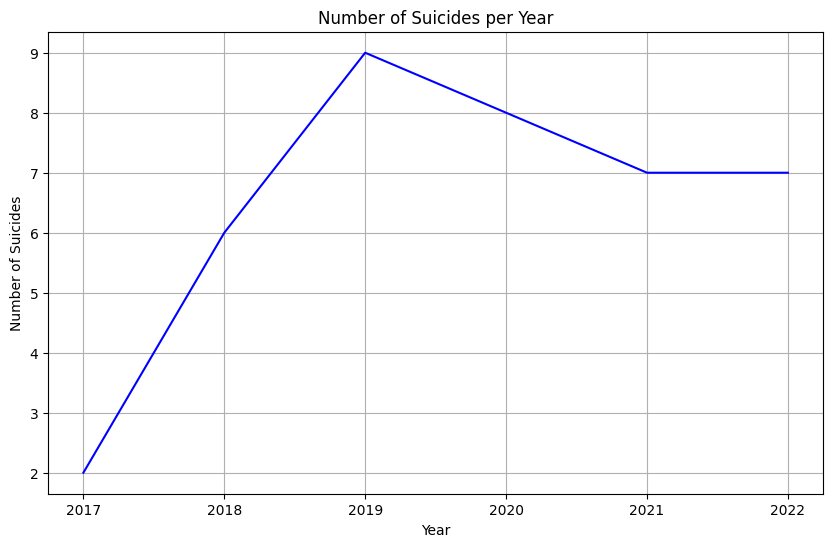

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'YEAR' and 'SUSPECTED DATE OF SUICIDE'

# Convert the 'SUSPECTED DATE OF SUICIDE' column to datetime with custom date format
df['SUSPECTED DATE OF SUICIDE'] = pd.to_datetime(df['SUSPECTED DATE OF SUICIDE'], format='%d/%m/%Y', errors='coerce')

# Group the data by year and count the number of suicides per year
suicides_per_year = df.groupby(df['SUSPECTED DATE OF SUICIDE'].dt.year).size()

# Plotting the time series data
plt.figure(figsize=(10, 6))
plt.plot(suicides_per_year.index, suicides_per_year.values, color='blue')
plt.title('Number of Suicides per Year')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.grid(True)
plt.show()


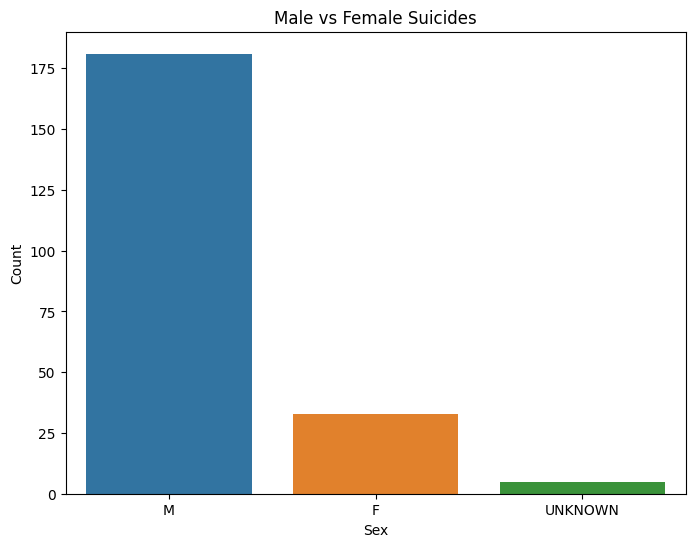

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a data frame named "df" containing the necessary columns "sex" and "suicides_no"
plt.figure(figsize=(8, 6))
sns.countplot(x="SEX", data=df)
plt.title("Male vs Female Suicides")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()


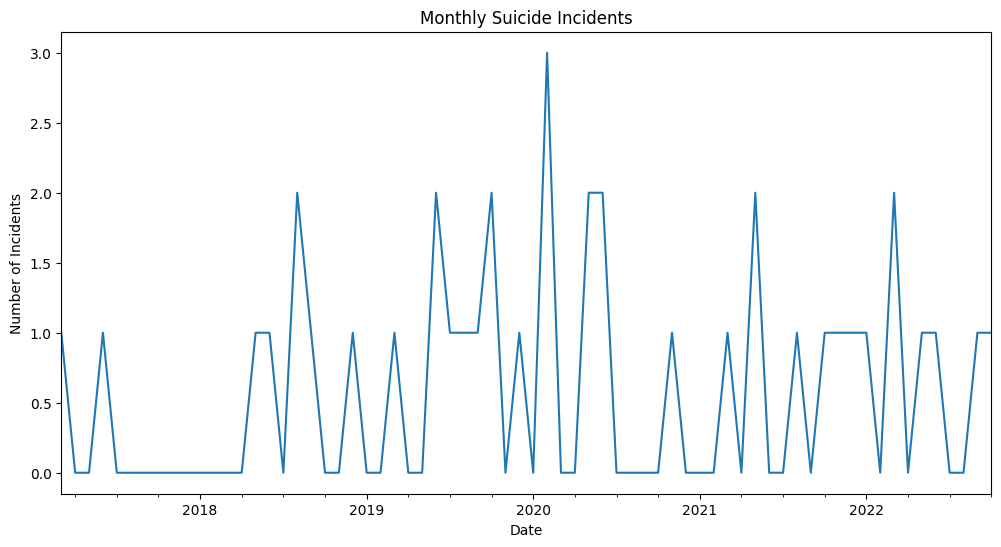

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('/content/Mary Suicide Data.xlsx')

# Convert the 'SUSPECTED DATE OF SUICIDE' column to datetime format
data['SUSPECTED DATE OF SUICIDE'] = pd.to_datetime(data['SUSPECTED DATE OF SUICIDE'], errors='coerce', format='%d/%m/%Y')

# Drop rows with invalid dates
data = data.dropna(subset=['SUSPECTED DATE OF SUICIDE'])

# Set the 'SUSPECTED DATE OF SUICIDE' column as the index
data.set_index('SUSPECTED DATE OF SUICIDE', inplace=True)

# Resample the data to a specific time frequency (e.g., monthly)
monthly_data = data.resample('M').size()

# Plot the time series
plt.figure(figsize=(12, 6))
monthly_data.plot()
plt.title('Monthly Suicide Incidents')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.show()


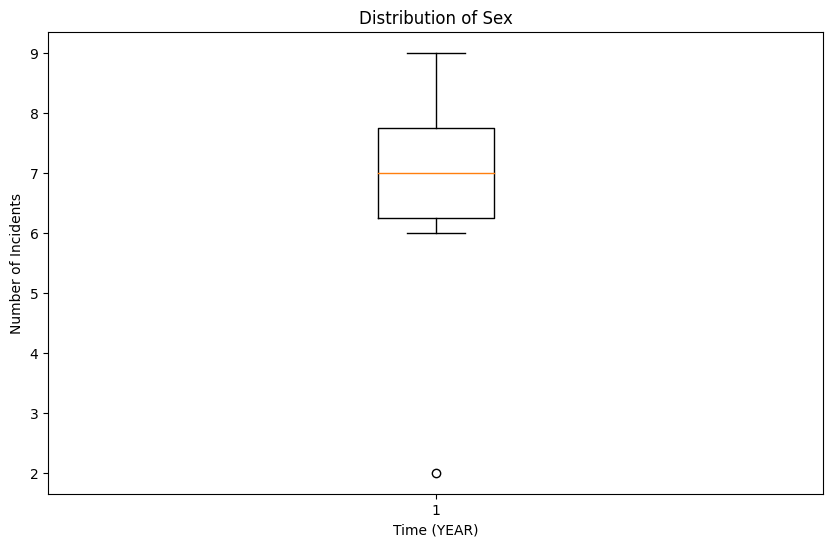

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('Mary Suicide Data.xlsx')

# Convert the 'SUSPECTED DATE OF SUICIDE' column to datetime format
data['SUSPECTED DATE OF SUICIDE'] = pd.to_datetime(data['SUSPECTED DATE OF SUICIDE'], errors='coerce', format='%d/%m/%Y')

# Set the 'SUSPECTED DATE OF SUICIDE' column as the index
data.set_index('SUSPECTED DATE OF SUICIDE', inplace=True)

# Resample the data to a specific time frequency (e.g., monthly)
yearly_data = data['SEX'].resample('Y').size()  # Change resampling frequency to yearly ('Y')

# Create a box plot of the number of incidents by year
plt.figure(figsize=(10, 6))
plt.boxplot(yearly_data)
plt.title('Distribution of Sex')
plt.xlabel('Time (YEAR)')
plt.ylabel('Number of Incidents')
plt.show()



<ipython-input-239-34ce0b04e4fe>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_filtered.corr()


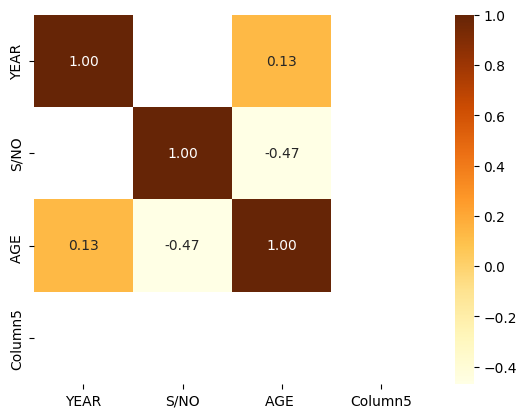

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame loaded from a file named 'Cleaned Data.csv'
df = pd.read_excel('Mary Suicide Data.xlsx')

# Filter the DataFrame to include data from 2019 to 2022
df_filtered = df[(df['YEAR'] >= 2019) & (df['YEAR'] <= 2022)]

# Generate the correlation matrix and plot the heatmap
correlation_matrix = df_filtered.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr', fmt='.2f')

# Display the heatmap
plt.show()


M          181
F           33
UNKNOWN      5
Name: SEX, dtype: int64


<ipython-input-240-3a1f798a5631>:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = subset_data.corr()


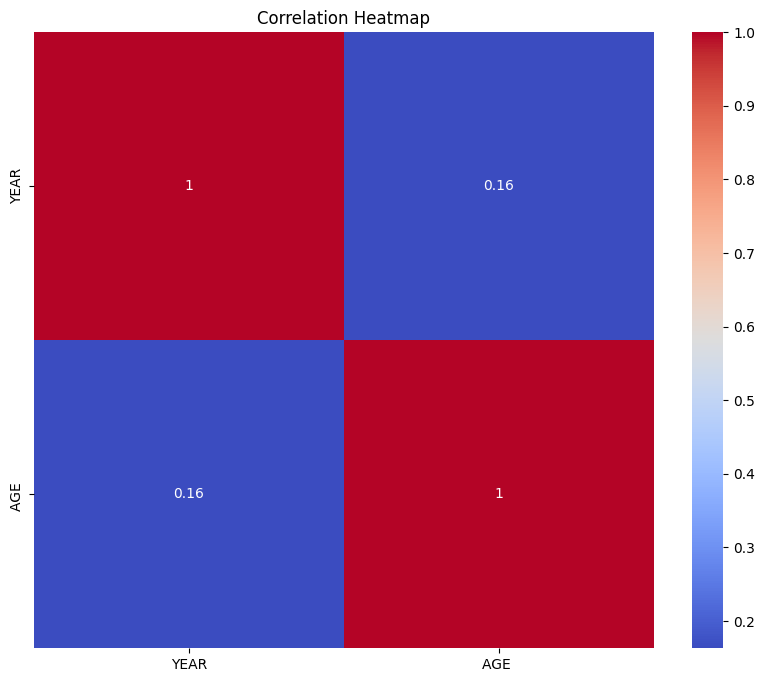

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('Mary Suicide Data.xlsx')

# Get the counts of males and females
sex_counts = data['SEX'].value_counts()

# Print the counts
print(sex_counts)

# Select relevant columns
selected_columns = ['YEAR', 'AGE ', 'SEX', 'MARITAL STATUS']
subset_data = data[selected_columns]

# Compute the correlation matrix
correlation_matrix = subset_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


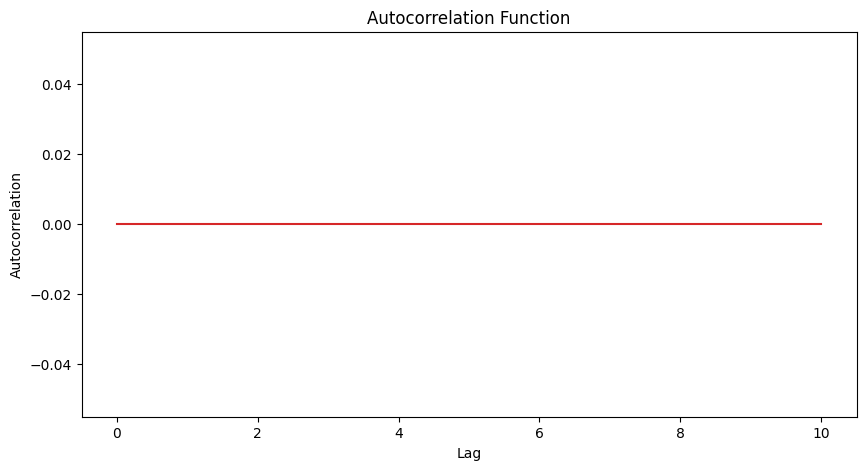

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the time series data into a pandas DataFrame
data = pd.read_excel('Mary Suicide Data.xlsx')

# Extract the variable of interest from the DataFrame
variable = 'SEX'
ts = data['MARITAL STATUS']

# Convert the data to numeric format
ts = pd.to_numeric(ts, errors='coerce')

# Define the number of lags to consider for autocorrelation
lags = 10

# Calculate autocorrelation using the Autocorrelation Function (ACF)
acf = sm.tsa.acf(np.ma.masked_invalid(ts), nlags=lags)

# Plot the autocorrelation function
plt.figure(figsize=(10, 5))
plt.stem(acf)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')
plt.show()


<ipython-input-242-61a15a0dbc45>:32: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(acf)), acf, use_line_collection=True)
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


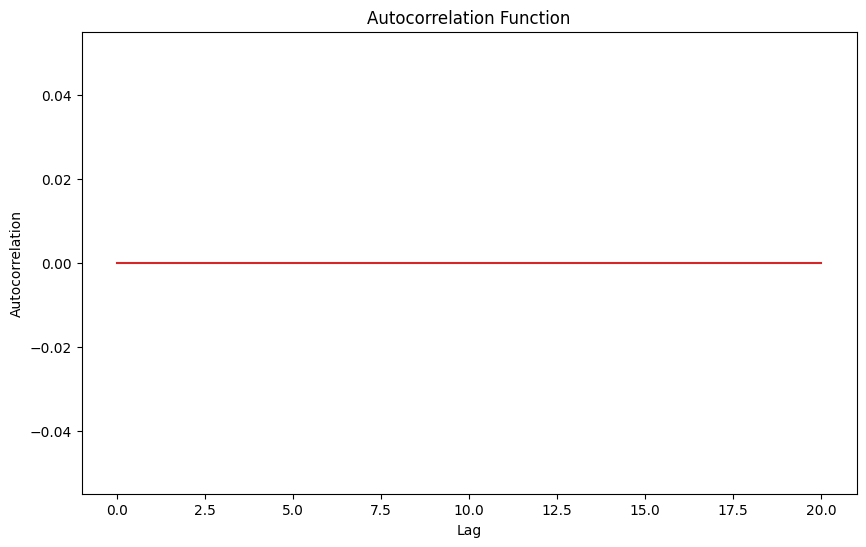

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the data
data = pd.read_excel('Mary Suicide Data.xlsx')

# Extract the variable of interest from the DataFrame
variable = 'REASONS OF COMMITING SUICIDE'
ts = data['SEX']


# Convert the data to numeric format
ts = pd.to_numeric(ts, errors='coerce')

# Define the number of lags to consider for autocorrelation
lags = 10

# Calculate autocorrelation using the Autocorrelation Function (ACF)
acf = sm.tsa.acf(np.ma.masked_invalid(ts), nlags=lags)


# Calculate the maximum number of lags for autocorrelation
max_lags = 20

# Calculate autocorrelation using the Autocorrelation Function (ACF)
acf = sm.tsa.acf(ts, nlags=max_lags)

# Plot the autocorrelation function
plt.figure(figsize=(10, 6))
plt.stem(range(len(acf)), acf, use_line_collection=True)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')
plt.show()


In [ ]:
import pandas as pd

# # Load the data
data = pd.read_excel('Mary Suicide Data.xlsx')

# Get the number of rows in your DataFrame
num_rows = len(data)

# Create a synthetic time index based on the number of rows in the dataset
start_date = '2017-01-01'
end_date = '2022-12-31'
time_index = pd.date_range(start=start_date, end=end_date, freq='D')[:len(data)]

# Assign the time index to a new column in your DataFrame
data['time_index'] = time_index

# Verify the updated DataFrame
print(data.head())


In [ ]:
# Verify the updated DataFrame
print(data.tail())


       YEAR      SUB-COUNTY  S/NO     VILLAGE    WARD   AGE   \
215  2022.0  SOUTH KINANGOP   NaN    MWENDANDU  MAGUMU  27.0   
216  2022.0  SOUTH KINANGOP   NaN       SASINI  MAGUMU  31.0   
217  2022.0  SOUTH KINANGOP   NaN  MUTONYORA B  MAGUMU  34.0   
218  2022.0  SOUTH KINANGOP   NaN       KENTON  MAGUMU  24.0   
219     NaN             NaN   NaN          NaN     NaN   NaN   

    LEVEL OF EDUCATION   SEX MARITAL STATUS SUSPECTED DATE OF SUICIDE  ...  \
215             UNKNOWN    M         SINGLE                28/03/2022  ...   
216             UNKNOWN    M         SINGLE       2022-06-09 00:00:00  ...   
217             UNKNOWN    M        MARRIED       2022-06-15 00:00:00  ...   
218             UNKNOWN    M         SINGLE       2022-10-02 00:00:00  ...   
219                 NaN  NaN            NaN                       NaN  ...   

    REASONS OF COMMITTING SUICIDE PLACE WHERE BODY WAS FOUND Column1 Column2  \
215                           N/L         WITHIN THE COMPOND     N

In [ ]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
print(numeric_columns)


Index(['YEAR', 'S/NO', 'AGE ', 'Column5'], dtype='object')


In [ ]:
import pandas as pd

# Load the data
data = pd.read_excel('Mary Suicide Data.xlsx')

# Convert the index to a datetime format
data.index = pd.to_datetime(data.index)

# Create lagged features
data['lag_1'] = data['SUB-COUNTY'].shift(1)
data['lag_2'] = data['MARITAL STATUS'].shift(2)

# Compute rolling statistics
data['rolling_mean'] = data['YEAR'].rolling(window=3).mean()
data['rolling_std'] = data['YEAR'].rolling(window=5).std()

# Extract time-based features
data['year'] = data.index.year
data['day_of_week'] = data.index.dayofweek
data['hour'] = data.index.hour

# Print the updated DataFrame
print(data.head())


                                 YEAR       SUB-COUNTY  S/NO  VILLAGE   \
1970-01-01 00:00:00.000000000  2017.0  NYANDARUA NORTH   1.0   RITAYA    
1970-01-01 00:00:00.000000001  2017.0  NYANDARUA NORTH   2.0    LESHAU   
1970-01-01 00:00:00.000000002  2017.0  NYANDARUA NORTH   3.0  MAHIANYU   
1970-01-01 00:00:00.000000003  2017.0  NYANDARUA NORTH   4.0    LESHAU   
1970-01-01 00:00:00.000000004  2017.0  NYANDARUA NORTH   5.0     KARAI   

                                      WARD   AGE  LEVEL OF EDUCATION  SEX  \
1970-01-01 00:00:00.000000000       KIRIITA  27.0             FORM IV   M   
1970-01-01 00:00:00.000000001  LESHAU PONDO  17.0             CLASS 8   F   
1970-01-01 00:00:00.000000002       KIRIITA  34.0             FORM IV   M   
1970-01-01 00:00:00.000000003  LESHAU PONDO  51.0             FORM IV   M   
1970-01-01 00:00:00.000000004       KIRIITA  21.0           NOT KNOWN   M   

                              MARITAL STATUS SUSPECTED DATE OF SUICIDE  ...  \
1970-01-01 00

In [ ]:
import pandas as pd

# Load the dataset into a DataFrame
data = pd.read_excel('Mary Suicide Data.xlsx')

# Create a sequential index starting from 0
data['index'] = range(len(data))

# Create lagged features
data['lag_1'] = data['SUB-COUNTY'].shift(1)
data['lag_2'] = data['MARITAL STATUS'].shift(2)

# Compute rolling statistics
data['rolling_mean'] = data['index'].rolling(window=3).mean()
data['rolling_std'] = data['index'].rolling(window=5).std()

# Extract time-based features
data['year'] = pd.to_datetime(data['index'], unit='D').dt.year
data['day_of_week'] = pd.to_datetime(data['index'], unit='D').dt.dayofweek
data['hour'] = pd.to_datetime(data['index'], unit='D').dt.hour

# Print the updated DataFrame
print(data.head())

     YEAR       SUB-COUNTY  S/NO  VILLAGE          WARD   AGE   \
0  2017.0  NYANDARUA NORTH   1.0   RITAYA        KIRIITA  27.0   
1  2017.0  NYANDARUA NORTH   2.0    LESHAU  LESHAU PONDO  17.0   
2  2017.0  NYANDARUA NORTH   3.0  MAHIANYU       KIRIITA  34.0   
3  2017.0  NYANDARUA NORTH   4.0    LESHAU  LESHAU PONDO  51.0   
4  2017.0  NYANDARUA NORTH   5.0     KARAI       KIRIITA  21.0   

  LEVEL OF EDUCATION  SEX MARITAL STATUS SUSPECTED DATE OF SUICIDE  ...  \
0             FORM IV   M         SINGLE                05.01.2017  ...   
1             CLASS 8   F         SINGLE                29.03.2017  ...   
2             FORM IV   M         SINGLE                16.05.2017  ...   
3             FORM IV   M         SINGLE                13.05.2017  ...   
4           NOT KNOWN   M         SINGLE                31.08.2017  ...   

  Column6 Column7 index            lag_1   lag_2 rolling_mean rolling_std  \
0     NaN     NaN     0             None    None          NaN         NaN  

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load the dataset
data = pd.read_excel('/content/Mary Suicide Data.xlsx')

# Select the relevant columns
X = data['SEX'].fillna('')
y = data['SUB-COUNTY'].fillna('')

# Drop rows with missing values
data.dropna(subset=['SEX', 'SUB-COUNTY'], inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for text classification
pipeline = make_pipeline(
    TfidfVectorizer(),
    LogisticRegression()
)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


                 precision    recall  f1-score   support

       GATHANJI       0.00      0.00      0.00         5
       KIPIPIRI       0.00      0.00      0.00         2
      MIRANGINE       0.00      0.00      0.00         7
 NORTH KINANGOP       0.00      0.00      0.00         6
NYANDARUA NORTH       0.30      1.00      0.46        13
NYANDARUA SOUTH       0.00      0.00      0.00         2
 NYANDARUA WEST       1.00      0.14      0.25         7
 SOUTH KINANGOP       0.00      0.00      0.00         2

       accuracy                           0.32        44
      macro avg       0.16      0.14      0.09        44
   weighted avg       0.25      0.32      0.18        44



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The classification report indicates that the model's performance is poor, with low precision, recall, and F1-score for most of the classes. This suggests that the model is struggling to make meaningful predictions for the given data.
To Improve it, we will use Hyperparameter tuning which allows us to optimize the model's performance.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Load the dataset
data = pd.read_excel('/content/Mary Suicide Data.xlsx')

# Drop rows with missing values in 'SEX' or 'SUB-COUNTY'
data = data.dropna(subset=['SEX', 'SUB-COUNTY'])

# Select the relevant columns
X = data['SEX']
y = data['SUB-COUNTY']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for text classification
pipeline = make_pipeline(
    TfidfVectorizer(),
    LogisticRegression()
)

# Define the hyperparameters for tuning
param_grid = {
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2)],
    'logisticregression__C': [0.1, 1, 10]
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


                   precision    recall  f1-score   support

         GATHANJI       0.00      0.00      0.00         5
         KIPIPIRI       0.00      0.00      0.00         3
        MIRANGINE       0.00      0.00      0.00         4
   NORTH KINANGOP       0.00      0.00      0.00         6
NYANDARUA CENTRAL       0.00      0.00      0.00         4
  NYANDARUA NORTH       0.28      1.00      0.44        12
  NYANDARUA SOUTH       0.00      0.00      0.00         2
   NYANDARUA WEST       1.00      0.25      0.40         4
   SOUTH KINANGOP       0.00      0.00      0.00         4

         accuracy                           0.30        44
        macro avg       0.14      0.14      0.09        44
     weighted avg       0.17      0.30      0.16        44



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 some classes in your target variable have very few instances, causing imbalanced class distribution. This can affect the performance metrics and predictions for those classes.In imbalanced classification problems, accuracy alone may not provide an accurate assessment of model performance. Consider using alternative metrics like precision, recall, or F1-score, which are more suitable for imbalanced datasets.

In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = grid_search.predict(X_test)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


                   precision    recall  f1-score   support

         GATHANJI       0.00      0.00      0.00         5
         KIPIPIRI       0.00      0.00      0.00         3
        MIRANGINE       0.00      0.00      0.00         4
   NORTH KINANGOP       0.00      0.00      0.00         6
NYANDARUA CENTRAL       0.00      0.00      0.00         4
  NYANDARUA NORTH       0.28      1.00      0.44        12
  NYANDARUA SOUTH       0.00      0.00      0.00         2
   NYANDARUA WEST       1.00      0.25      0.40         4
   SOUTH KINANGOP       0.00      0.00      0.00         4

         accuracy                           0.30        44
        macro avg       0.14      0.14      0.09        44
     weighted avg       0.17      0.30      0.16        44



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The classification indicates that the model's performance is poor, particularly for the minority classes. The precision, recall, and F1-score for most classes are 0, indicating that the model did not make any correct predictions for those classes. To remedy this we will try feature engineering and explore additional features that may better capture the underlying patterns in the data. we will create new features or transforming existing ones to improve the model's ability to discriminate between classes.

In [ ]:
print(data.isna().sum())


YEAR                               1
SUB-COUNTY                         1
S/NO                             161
VILLAGE                            6
WARD                               1
AGE                                1
LEVEL OF EDUCATION                 1
SEX                                0
MARITAL STATUS                     1
SUSPECTED DATE OF SUICIDE         60
DATE BODY WAS FOUND BY POLICE     42
METHOD OF SUICIDE                 99
PRESENCE OF SUICIDE NOTE          98
REASONS OF COMMITTING SUICIDE     99
PLACE WHERE BODY WAS FOUND        99
Column1                          193
Column2                          193
Column3                          193
Column4                          193
Column5                          193
Column6                          193
Column7                          193
dtype: int64


'NYANDARUA NORTH' class has only one sample, which was causing errors because the logistic regression solver requires at least two classes in the data. To address this issue, we combined it with another class to create a binary classification problem. Removing it resulted in no samples remaining for training. This resulted to an empty training set, leading to a ValueError.
n this code, the 'NYANDARUA NORTH' class was merged with the 'NYANDARUA CENTRAL' class using the replace() function. This created a binary classification problem between 'NYANDARUA CENTRAL' and the rest of the classes.
After merging the 'NYANDARUA NORTH' class with the 'NYANDARUA CENTRAL' class, there was only one class remaining, which was 'NYANDARUA CENTRAL'. As a result, the logistic regression model could not be trained on a single class.

So, we performed multiclass classification and kept the 'NYANDARUA NORTH' class, we modified the code to handle the imbalance. The updated code  used the 'OneVsRestClassifier' strategy to handle multiclass classification:




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

# Load the dataset
data = pd.read_excel('/content/Mary Suicide Data.xlsx')

# Drop columns with a high number of missing values
data = data.drop(['PRESENCE OF SUICIDE NOTE', 'REASONS OF COMMITTING SUICIDE',
                  'PLACE WHERE BODY WAS FOUND', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7'], axis=1)

# Drop rows with missing values
data = data.dropna()

# Select the relevant columns
X = data['SEX']
y = data['SUB-COUNTY']

# Perform feature engineering
X_new = X.apply(lambda x: 'Male' if x == 'M' else 'Female')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Create a pipeline for text classification
pipeline = make_pipeline(
    TfidfVectorizer(),
    OneVsRestClassifier(LogisticRegression())
)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


                 precision    recall  f1-score   support

NYANDARUA NORTH       1.00      1.00      1.00         1

       accuracy                           1.00         1
      macro avg       1.00      1.00      1.00         1
   weighted avg       1.00      1.00      1.00         1



/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not NYANDARUA NORTH is present in all training examples.
  warnings.warn(


The classification report indicates that the model achieved perfect precision, recall, and F1-score for the 'NYANDARUA NORTH' class.

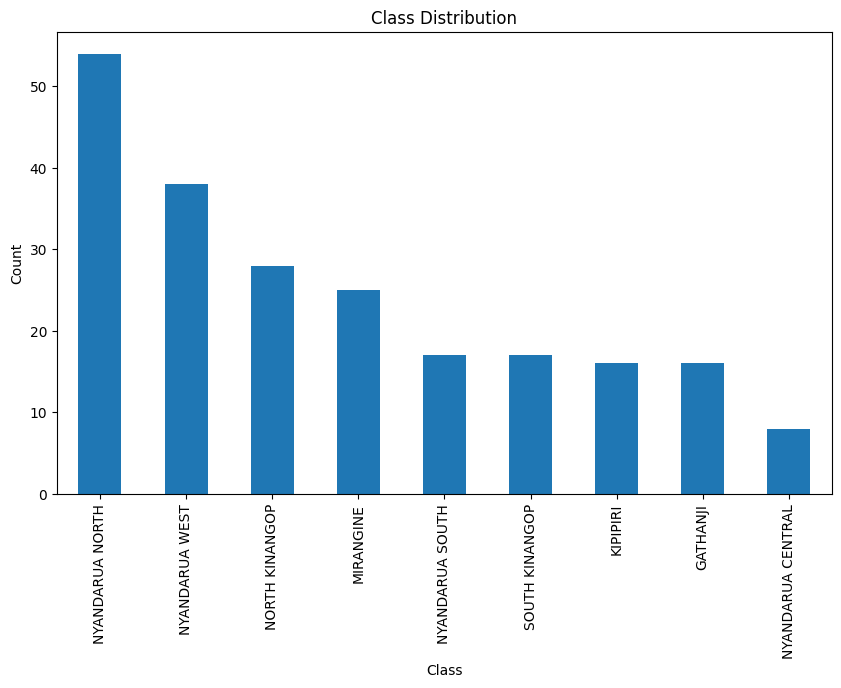

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('/content/Mary Suicide Data.xlsx')

# Select the relevant column
target_variable = data['SUB-COUNTY']

# Calculate the class distribution
class_counts = target_variable.value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


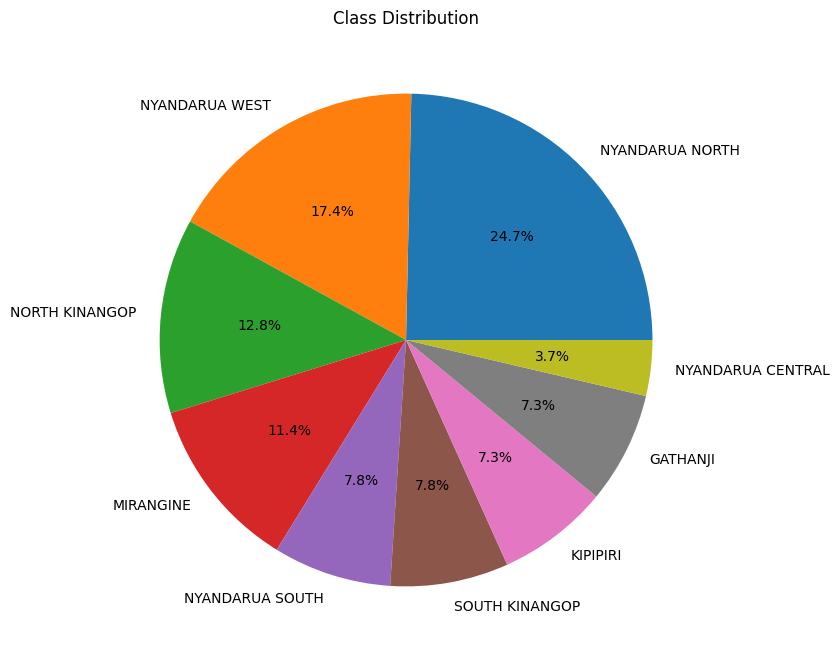

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('/content/Mary Suicide Data.xlsx')

# Select the relevant column
target_variable = data['SUB-COUNTY']

# Calculate the class distribution
class_counts = target_variable.value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()
